In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import os

In [2]:
os.listdir()

['Housing_Price_Prediction.ipynb', '.ipynb_checkpoints', 'kc_house_data.csv']

In [3]:
#Read the file and save as data frame
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
data.shape

(21597, 21)

In [23]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
#To check the presence of null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataset has no null values.

<Figure size 864x576 with 0 Axes>

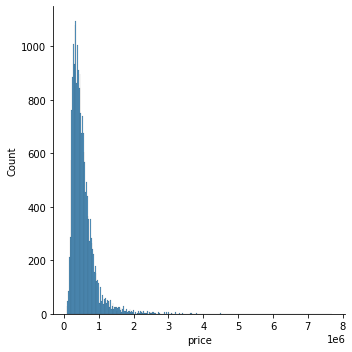

In [16]:
plt.figure(figsize=(12,8))
sns.displot(data['price'])

/Users/spandanatammineedi/Desktop/Anaconda/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

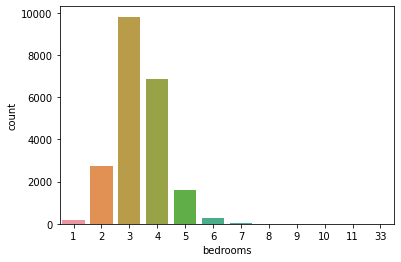

In [13]:
sns.countplot(data['bedrooms'])

/Users/spandanatammineedi/Desktop/Anaconda/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

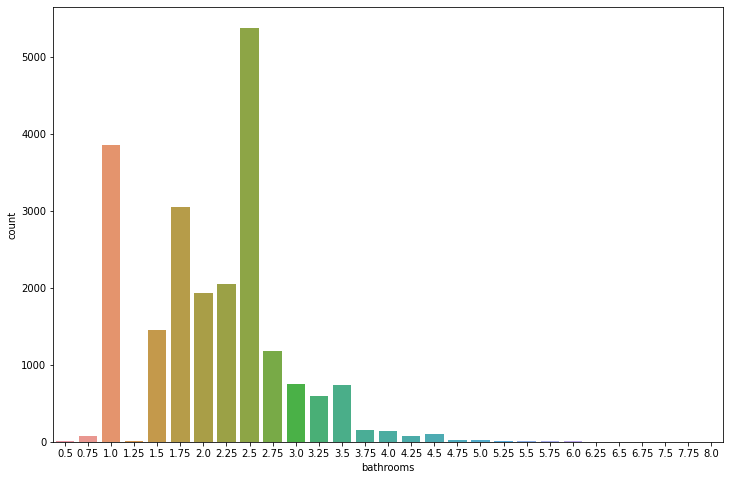

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data['bathrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

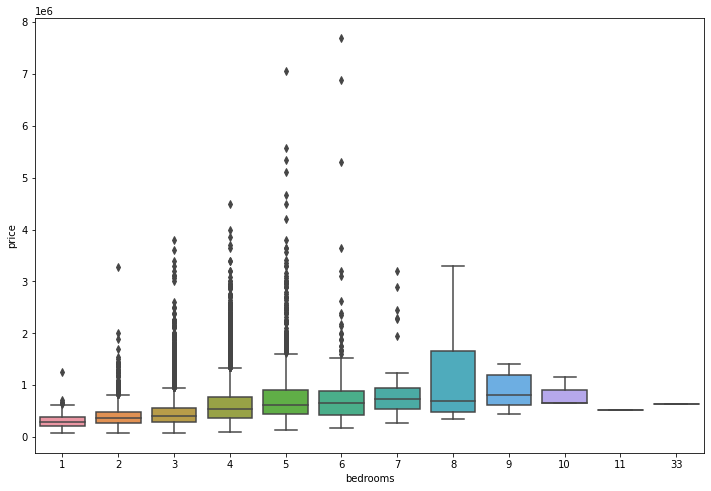

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=data)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

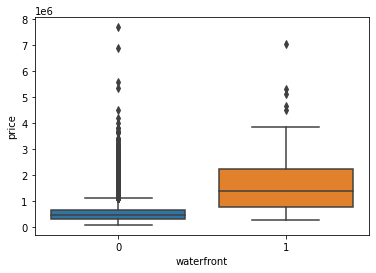

In [21]:
sns.boxplot(x='waterfront',y='price',data=data)

In [24]:
#FEATURE ENGINEERING DATE

In [26]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].apply(lambda date:date.month)
data['year'] = data['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='month'>

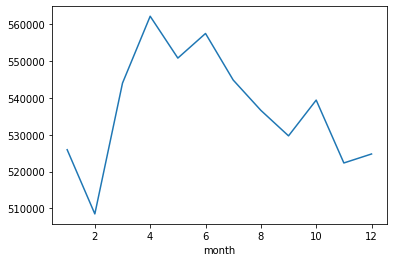

In [27]:
data.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

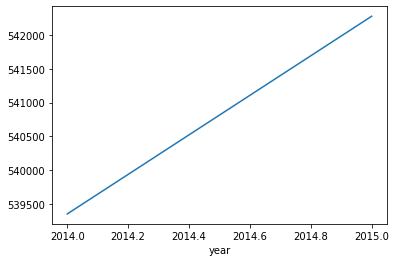

In [28]:
data.groupby('year').mean()['price'].plot()

In [29]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [30]:
#Remove features that are not required for training

In [43]:
data = data.drop('id',axis = 1)
data = data.drop('date',axis = 1)
data = data.drop('zipcode',axis = 1)

In [44]:
data.shape

(21597, 20)

In [45]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<AxesSubplot:>

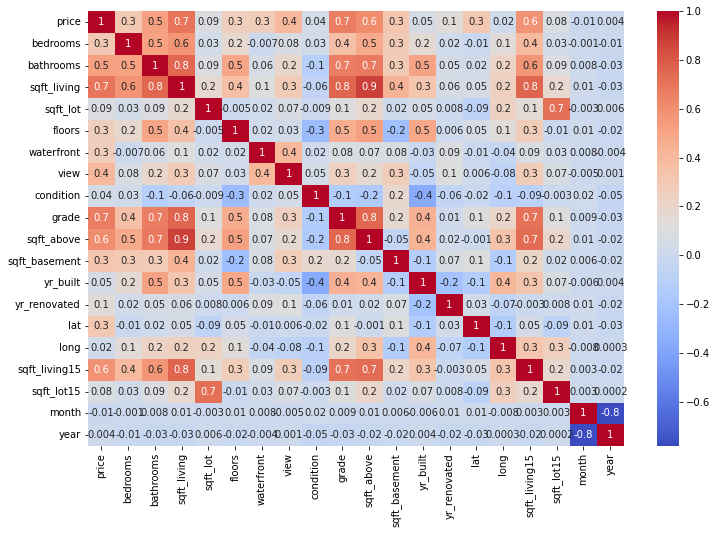

In [46]:
#Correlation
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True, fmt = '.1g', cmap = 'coolwarm')

In [47]:
#Price has positive correlation with features like sqft_living,grade,sqft_above,sqft_living15,bathrooms etc. 
# These features must be included in building the prediction model. 

## TEST TRAIN SPLIT

In [48]:
X = data.drop('price',axis=1)
y = data['price']

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_test.shape

(6480, 19)

In [54]:
X_train.shape

(15117, 19)

## GENERATING A MODEL

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [66]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

2021-11-21 05:58:29.094401: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-21 05:58:29.094945: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 108us/sample - loss: 430238358410.2031 - val_loss: 418898188940.3259
Epoch 2/400
15117/15117 [==============================] - 0s 27us/sample - loss: 428898409055.0707 - val_loss: 414382556268.7210
Epoch 3/400
15117/15117 [==============================] - 0s 27us/sample - loss: 412059257274.6021 - val_loss: 377013245957.0568
Epoch 4/400
15117/15117 [==============================] - 0s 27us/sample - loss: 334388873906.7952 - val_loss: 253270920477.7086
Epoch 5/400
15117/15117 [==============================] - 0s 27us/sample - loss: 183805475046.9876 - val_loss: 115930506894.8543
Epoch 6/400
15117/15117 [==============================] - 0s 26us/sample - loss: 104283381277.7033 - val_loss: 95354151812.1086
Epoch 7/400
15117/15117 [==============================] - 0s 27us/sample - loss: 97730032476.5475 - val_loss: 93830998749.2346
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 0s 31us/sample - loss: 39223580932.9618 - val_loss: 37900236193.1852
Epoch 65/400
15117/15117 [==============================] - 0s 30us/sample - loss: 38949485292.7793 - val_loss: 37613567560.0593
Epoch 66/400
15117/15117 [==============================] - 0s 30us/sample - loss: 38646330641.5273 - val_loss: 37335700522.9827
Epoch 67/400
15117/15117 [==============================] - 0s 30us/sample - loss: 38419052495.9058 - val_loss: 37073690452.0691
Epoch 68/400
15117/15117 [==============================] - 0s 29us/sample - loss: 38174067393.4267 - val_loss: 36883063790.3012
Epoch 69/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37890052715.5346 - val_loss: 36592013524.3852
Epoch 70/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37677741148.5983 - val_loss: 36410242723.0815
Epoch 71/400
15117/15117 [==============================] - 0s 29us/sample - loss: 37524334158.3393 - val_loss

15117/15117 [==============================] - 0s 29us/sample - loss: 32970645335.4671 - val_loss: 31693264157.7086
Epoch 128/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32936582116.4305 - val_loss: 31538148723.6741
Epoch 129/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32880357222.5050 - val_loss: 31520750736.1185
Epoch 130/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32866845045.9155 - val_loss: 31570468560.5926
Epoch 131/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32836461286.3780 - val_loss: 31483754814.5778
Epoch 132/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32805139391.5809 - val_loss: 31450919281.1457
Epoch 133/400
15117/15117 [==============================] - 0s 31us/sample - loss: 32741418327.0945 - val_loss: 31359679247.8025
Epoch 134/400
15117/15117 [==============================] - 0s 30us/sample - loss: 32722704473.0081 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 31513664040.9478 - val_loss: 29763952791.7037
Epoch 191/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31457674805.1407 - val_loss: 29716400476.9185
Epoch 192/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31447595927.7507 - val_loss: 29725578819.0025
Epoch 193/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31505008504.9637 - val_loss: 29761874046.4198
Epoch 194/400
15117/15117 [==============================] - 0s 30us/sample - loss: 31421598535.9550 - val_loss: 29756656318.8938
Epoch 195/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31420798395.3472 - val_loss: 29709000344.9679
Epoch 196/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31405030974.7595 - val_loss: 29748359451.1802
Epoch 197/400
15117/15117 [==============================] - 0s 31us/sample - loss: 31359586503.2861 - v

15117/15117 [==============================] - 0s 31us/sample - loss: 30699980916.9163 - val_loss: 28767405963.6938
Epoch 254/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30784815715.5414 - val_loss: 28765749146.8642
Epoch 255/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30698411408.6721 - val_loss: 28767947813.9259
Epoch 256/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30691274141.4069 - val_loss: 28743678831.8815
Epoch 257/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30662923306.2010 - val_loss: 28731330959.4864
Epoch 258/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30647075310.6929 - val_loss: 28718044192.8691
Epoch 259/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30650466935.6597 - val_loss: 28700459099.0222
Epoch 260/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30642669077.4392 - v

15117/15117 [==============================] - 0s 30us/sample - loss: 30196225591.1390 - val_loss: 28071029064.6914
Epoch 317/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30181444835.1265 - val_loss: 28039670811.8124
Epoch 318/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30164674034.0798 - val_loss: 28013854001.9358
Epoch 319/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30142643097.2410 - val_loss: 28088446005.0963
Epoch 320/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30182051394.5529 - val_loss: 28031359112.5333
Epoch 321/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30158553533.7858 - val_loss: 27982387098.8642
Epoch 322/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30126931989.1174 - val_loss: 28116641786.9432
Epoch 323/400
15117/15117 [==============================] - 0s 31us/sample - loss: 30131496556.9571 - v

15117/15117 [==============================] - 0s 28us/sample - loss: 29664022729.3860 - val_loss: 27413461356.0889
Epoch 380/400
15117/15117 [==============================] - 0s 29us/sample - loss: 29663496121.4844 - val_loss: 27440682517.4914
Epoch 381/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29672207431.0575 - val_loss: 27406510914.3704
Epoch 382/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29633264317.7011 - val_loss: 27404573293.9852
Epoch 383/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29645137028.0897 - val_loss: 27372536799.1309
Epoch 384/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29638090499.5055 - val_loss: 27346056907.5358
Epoch 385/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29646437921.4966 - val_loss: 27353339433.7185
Epoch 386/400
15117/15117 [==============================] - 0s 30us/sample - loss: 29589080662.2647 - v

<AxesSubplot:>

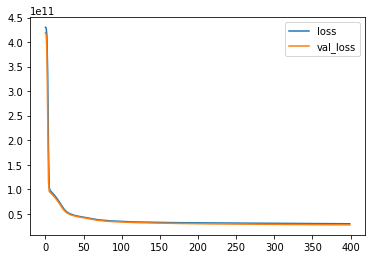

In [67]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [68]:
predictions = model.predict(X_test)